# Seaborn Visualization

### Introduction

Visualizations of Pokemon data using Seaborn.

Data source: [https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv](https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv)

In [1]:
# Loads watermark extension and prints details about current platform
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,psycopg2
 
# import packages
%matplotlib inline
%load_ext dotenv
# Use find_dotenv to locate the file
%dotenv

import pandas as pd
import pandas.io.sql as psql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import psycopg2

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

Wed Nov 21 2018 

CPython 3.7.0
IPython 7.1.1

numpy 1.15.4
scipy 1.1.0
sklearn 0.20.0
pandas 0.23.4
psycopg2 2.7.5 (dt dec pq3 ext lo64)

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
/Users/sebp/LocalDocuments2/Data Science/portfolio/visualizations/seaborn-pokemon


### 0.0 Import and Preview the Available Data

Let's read the csv into a pandas dataframe.

In [2]:
pokemon_df = pd.read_csv(PROJ_ROOT + '/data/raw/Pokemon.csv', index_col=0, encoding="ISO-8859-1")

Let's take a peak inside to see what our data looks like.

In [3]:
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# 1- Plotting with Seaborn

### 1.0 Scatterplot

Let's compare the Attack and Defense stats for our Pokémon:

Seaborn doesn't have a dedicated scatter plot function. We actually need to use Seaborn's function for fitting and plotting a regression line, and remove the regression line. To do so, we will

- Set fit_reg=False to remove the regression line, since we only want a scatter plot.
- Set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.
- set the axis start points at 0 using matplotlib

(0, 141.97310248937742)

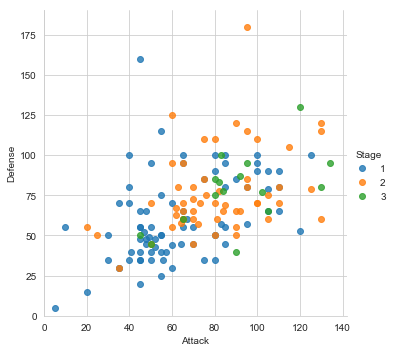

In [4]:
sns.set_style('whitegrid')

sns.lmplot(x='Attack', y='Defense', data=pokemon_df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
plt.ylim(0, None)
plt.xlim(0, None)

### 1.1 - Boxplot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

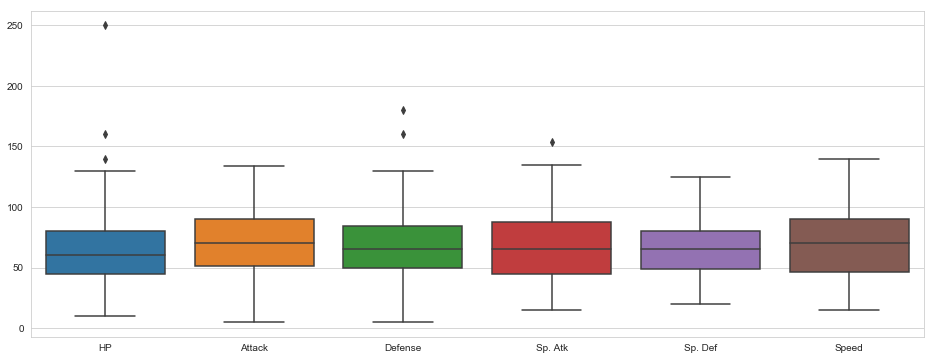

In [5]:
# Pre-format DataFrame
stats_df = pokemon_df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# large sized plot
plt.figure(figsize=(16, 6))

# New boxplot using stats_df
sns.boxplot(data=stats_df)

### 1.2 - Violin Plot

Violin plots are alternatives to box plots. They show the distribution through thickness. We'll use some extra logic to make the colors match up to the pokemon types.

/Users/sebp/miniconda3/envs/crime-analysis/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


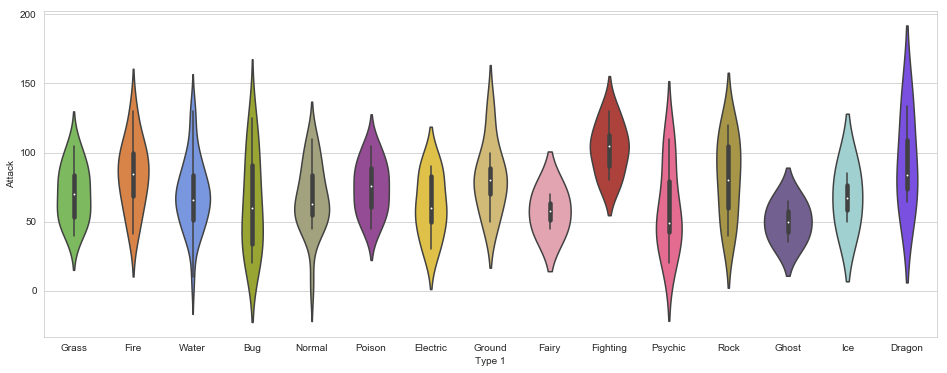

In [6]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# large sized plot
plt.figure(figsize=(16, 6))

sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=pokemon_df, palette=pkmn_type_colors)

 Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

### 1.3 - Swarm Plot

While violin plots show distributions, swarm plots show each point in the dataset, stacking similar values.

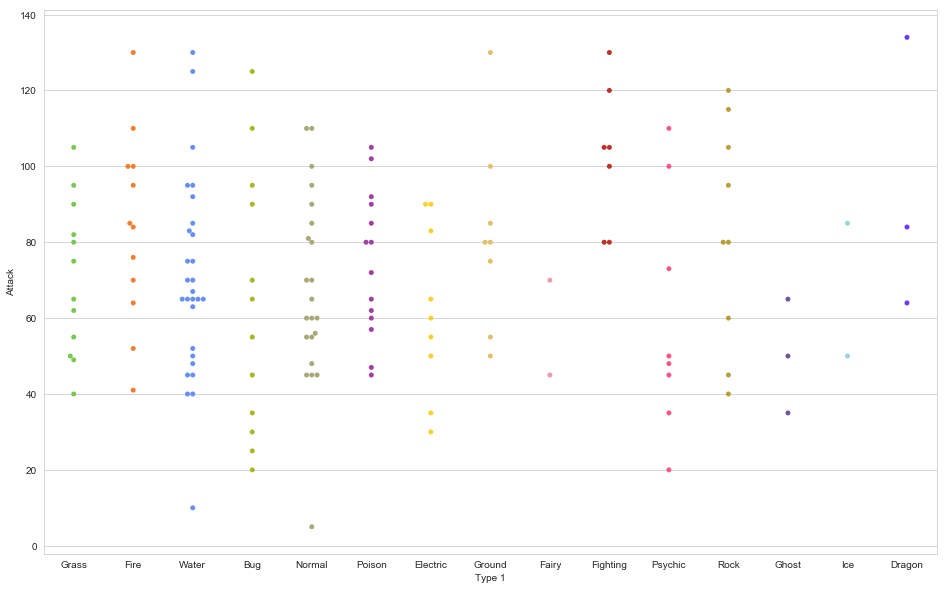

In [7]:
# large sized plot
plt.figure(figsize=(16, 10))

sns.swarmplot(x='Type 1', y='Attack', data=pokemon_df, 
              palette=pkmn_type_colors)

### 1.4 - Overlaying Violin and Swarm Plots

First, we'll make our figure larger using Matplotlib.
Then, we'll plot the violin plot. However, we'll set `inner=None` to remove the bars inside the violins.
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
Finally, we'll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

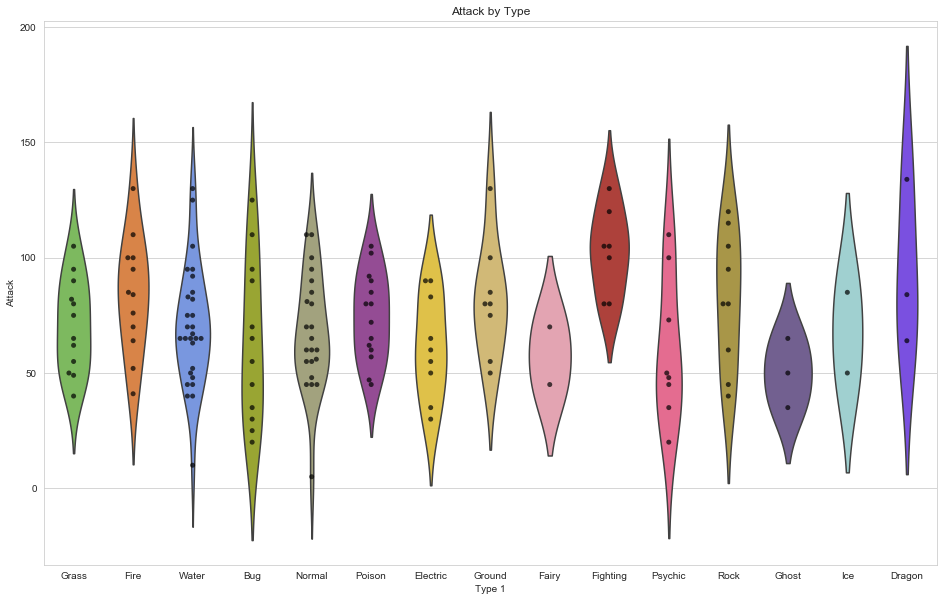

In [8]:
# large sized plot
plt.figure(figsize=(16, 10))

 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=pokemon_df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=pokemon_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

### 1.5 - Visualizing Distribution of All stats (Swarmplot)

We could repeat the above chart for every stat, but that would get repititive and hard to compare.

We'll use the `melt` function in pandas to turn all the stat columns into rows. In other words, each pokemon should now have 6 rows, one for each stat.

In [9]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

print('Original dataframe shape (rows, columns)', stats_df.shape )
print('Melted dataframe shape (rows, columns)', melted_df.shape )

melted_df.head()

Original dataframe shape (rows, columns) (151, 9)
Melted dataframe shape (rows, columns) (906, 5)


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


Now we can use the melted dataframe to create a swarm plot of each pokemon types stat distributions

/Users/sebp/miniconda3/envs/crime-analysis/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


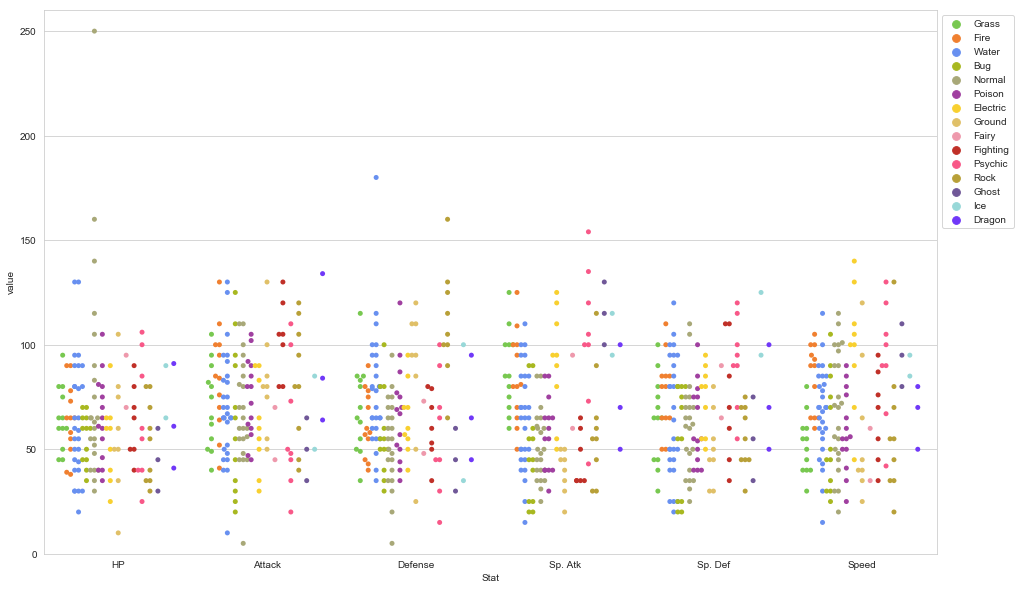

In [10]:
# large sized plot
plt.figure(figsize=(16, 10))

sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1', split=True, palette=pkmn_type_colors)

# adjust y-axis
plt.ylim(0, 260)
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### 1.6 - Histogram

Histograms are another way of visualizing the distribution of a dataset. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

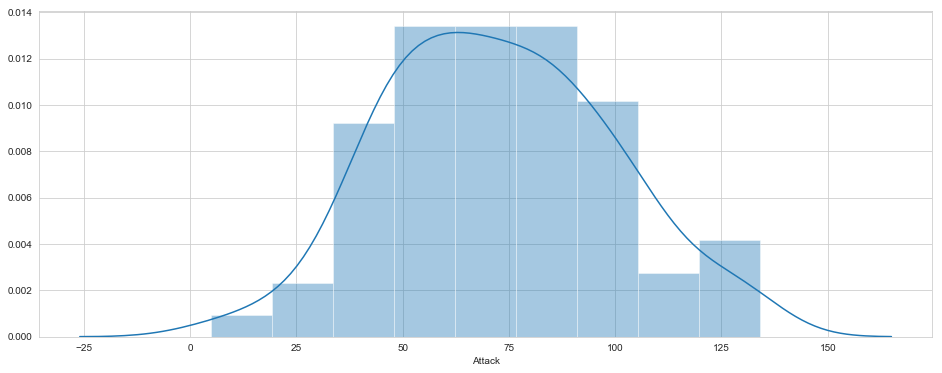

In [11]:
plt.figure(figsize=(16, 6))
sns.distplot(pokemon_df.Attack)

Seaborn makes it easy to plot multiple histograms at once.

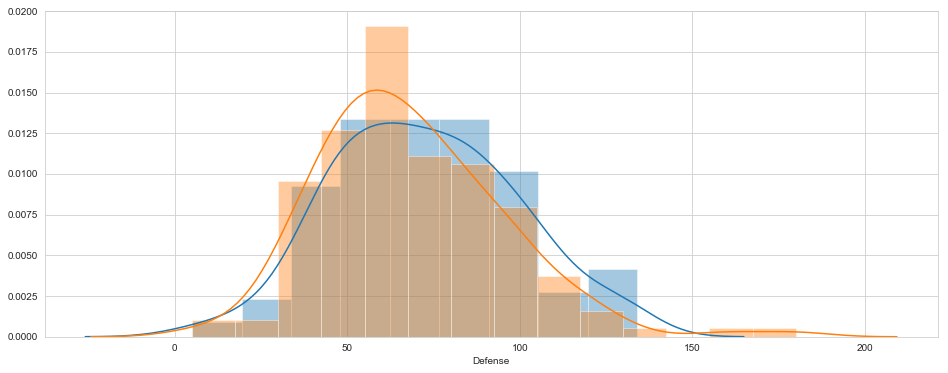

In [12]:
plt.figure(figsize=(16, 6))

sns.distplot(pokemon_df.Attack)
sns.distplot(pokemon_df.Defense)

### 1.7 Bar Plot

Bar plots help us visualize the distribution of categorical variables. In this case, we will visualizze the count of each pokemon type in the dataset.

Text(0.5, 1.0, 'Count of each Pokemon type')

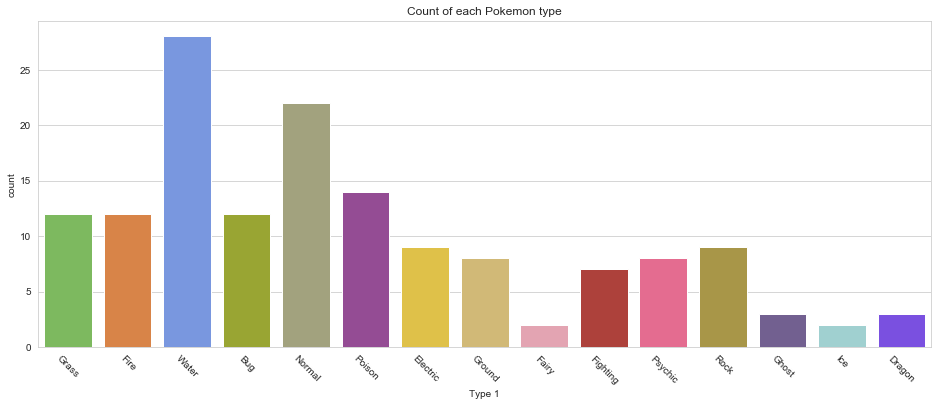

In [13]:
plt.figure(figsize=(16, 6))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=pokemon_df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title('Count of each Pokemon type')

### 1.7 - Density Plot

Displays the distribution between two variables.

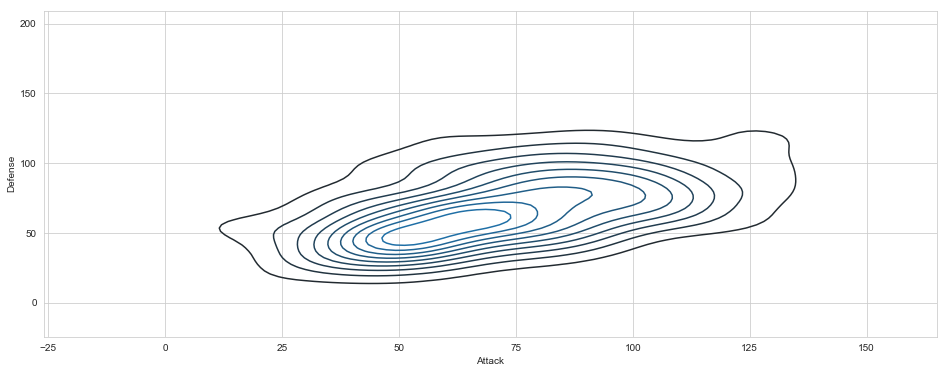

In [14]:
plt.figure(figsize=(16, 6))

sns.kdeplot(pokemon_df.Attack, pokemon_df.Defense)